In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# 自定义设置 # 添加根目录路径到搜索列表
import sys
sys.path.append(r'C:\Users\86199\Documents\GitHub\DataAnalysis')
from my_setting import my_pd_setting,my_np_setting,my_sns_setting,data_path
from my_stat import get_col_dtypes, missing, drop_columns, des_classifi
my_pd_setting()
my_sns_setting()
my_np_setting()
filepath= r'C:\Users\86199\Documents\Datas\DC\C4'
filename = data_path(filepath=filepath)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

pandas的版本为: 1.3.4
seaborn的版本为: 0.11.2
numpy的版本为1.20.3
当前脚本路径: 
c:\Users\86199\Documents\GitHub\DataAnalysis\DC\C4
数据存储路径: 
C:\Users\86199\Documents\Datas\DC\C4
数据路径存在文件: 
['submit_example.csv', 'test_noLabel.csv', 'train.csv']


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_noLabel.csv')
dtype,type_info = get_col_dtypes(train)
dtype.T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Columns: 32 entries, ID to Label
dtypes: int64(24), object(8)
memory usage: 275.1+ KB
None


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
var_names,ID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label
dtypes,int64,int64,object,object,int64,int64,object,int64,int64,object,int64,int64,object,int64,object,int64,int64,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [3]:
miss = missing(train)
miss

缺失值var_name: []


,var_name,missing,per


##### 变量描述统计

In [4]:
type_info

,dtypes
int64,24
object,8


In [5]:
def group_by_class(df, var_names, y_col, shows=True):
    '''
    df:包含因变量的数据框
    '''
    dict_df = {col: df.groupby(by=col, as_index=False).agg(y_mean=(y_col, np.mean)) for col in var_names}
    if shows is True:
        for k, v in dict_df.items():
            print('>>>'*20)
            print(f'''分类变量 {k}: ''')
            print(v)
    else:
        pass
    return dict_df


In [6]:
for each in type_info.index:
    print(each)
classfi_var = train.select_dtypes(include=['object'])
continue_var = train.select_dtypes(exclude=['object'])
for col in classfi_var.columns:
    print(f'''>>>'''*20)
    print(train.groupby(by=col,as_index=False).agg(col_mean=('Label', np.mean)))

int64
object
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
  BusinessTravel      col_mean
0         Non-Travel  0.08    
1  Travel_Frequently  0.22    
2      Travel_Rarely  0.16    
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
  Department               col_mean
0         Human Resources  0.21    
1  Research & Development  0.14    
2                   Sales  0.20    
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
  EducationField     col_mean
0   Human Resources  0.32    
1     Life Sciences  0.15    
2         Marketing  0.21    
3           Medical  0.14    
4             Other  0.11    
5  Technical Degree  0.24    
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
  Gender   col_mean
0  Female  0.15    
1    Male  0.17    
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
  JobRole                     col_mean
0  Healthcare Representative  0.05    
1            Human Resources  0.27    
2      Laboratory Technicia

In [7]:
classifi = group_by_class(train, classfi_var.columns, y_col='Label')

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
分类变量 BusinessTravel: 
  BusinessTravel      y_mean
0         Non-Travel  0.08  
1  Travel_Frequently  0.22  
2      Travel_Rarely  0.16  
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
分类变量 Department: 
  Department               y_mean
0         Human Resources  0.21  
1  Research & Development  0.14  
2                   Sales  0.20  
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
分类变量 EducationField: 
  EducationField     y_mean
0   Human Resources  0.32  
1     Life Sciences  0.15  
2         Marketing  0.21  
3           Medical  0.14  
4             Other  0.11  
5  Technical Degree  0.24  
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
分类变量 Gender: 
  Gender   y_mean
0  Female  0.15  
1    Male  0.17  
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
分类变量 JobRole: 
  JobRole                     y_mean
0  Healthcare Representative  0.05  
1            Human Resources

In [8]:
train.set_index('ID', inplace=True)
test.set_index('ID', inplace=True)
train.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label
count,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.0,1100.0,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00
mean,37.00,9.43,2.92,1028.16,2.73,2.73,2.05,2.73,6483.62,2.68,15.24,3.15,2.7,80.0,0.79,11.22,2.81,2.75,7.01,4.21,2.23,4.12,0.16
std,9.04,8.20,1.02,598.92,1.10,0.71,1.11,1.11,4715.29,2.51,3.63,0.36,1.1,0.0,0.84,7.83,1.29,0.70,6.22,3.62,3.31,3.60,0.37
min,18.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1009.00,0.00,11.00,3.00,1.0,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,2.00,2.00,504.25,2.00,2.00,1.00,2.00,2924.50,1.00,12.00,3.00,2.0,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00,0.00
50%,36.00,7.00,3.00,1026.50,3.00,3.00,2.00,3.00,4857.00,2.00,14.00,3.00,3.0,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00,0.00
75%,43.00,15.00,4.00,1556.50,4.00,3.00,3.00,4.00,8354.50,4.00,18.00,3.00,4.0,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00,0.00
max,60.00,29.00,5.00,2065.00,4.00,4.00,5.00,4.00,19999.00,9.00,25.00,4.00,4.0,80.0,3.00,40.00,6.00,4.00,37.00,18.00,15.00,17.00,1.00


In [14]:
# EmployeeNumber:员工号码
columns = ['EmployeeNumber']
train = drop_columns(train,columns=columns)
test = drop_columns(test, columns=columns)

In [15]:
print(train.shape)
print(train['Label'].value_counts())
# # plt.pie(train['Label'].value_counts())
# train['Label'].value_counts().plot.pie(explode=[0, 0.2])
# # explod控制饼图分离

(1100, 30)
0    922
1    178
Name: Label, dtype: int64


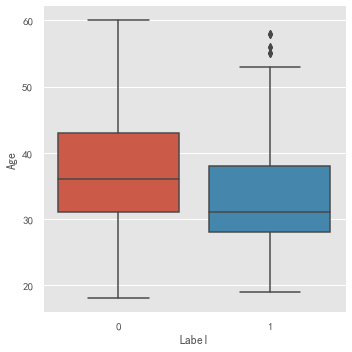

In [8]:
# 箱线图的中间一条线：中位数
# print(train[['Age']].describe())
sns.catplot(x='Label', y='Age',data=train, kind='box')